<a href="https://colab.research.google.com/github/MelinaIo83/4GeeksAcademy/blob/master/Proyecto_de_Serie_Temporal_Alternativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Serie Temporal Alternativa

#Sistema de predicción de ventas:

Queremos establecer el almacén de nuestra empresa en otra localización y necesitamos estimar el ritmo de las ventas, que desde la creación de la empresa ha ido en aumento, para los próximos meses, a fin de proveer el espacio que necesitaremos.

In [1]:
# Your code here
import pandas as pd
sales_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
sales_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


Convertir datos en la column date a pd.to_datetime (en format corresp fecha)

In [2]:
num_entries = sales_data.shape[0]
print("Number of entries:", num_entries)

Number of entries: 366


In [3]:
sales_data["date"] = pd.to_datetime(sales_data["date"])
sales_data = sales_data.set_index("date")
sales_total = sales_data["sales"]
sales_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

Construye la estructura de datos válida para la serie temporal, grafícala y, a continuación, analízala y responde a las siguientes preguntas:
¿Cuál es el tensor de la serie temporal?
¿Cuál es la tendencia?
¿Es estacionaria?
¿Existe variabilidad o presencia de ruido?

In [4]:
unique_dates = sales_total.index.unique()
print("Unique dates:", unique_dates)

Unique dates: DatetimeIndex(['2022-09-03 17:10:08.079328', '2022-09-04 17:10:08.079328',
               '2022-09-05 17:10:08.079328', '2022-09-06 17:10:08.079328',
               '2022-09-07 17:10:08.079328', '2022-09-08 17:10:08.079328',
               '2022-09-09 17:10:08.079328', '2022-09-10 17:10:08.079328',
               '2022-09-11 17:10:08.079328', '2022-09-12 17:10:08.079328',
               ...
               '2023-08-25 17:10:08.079328', '2023-08-26 17:10:08.079328',
               '2023-08-27 17:10:08.079328', '2023-08-28 17:10:08.079328',
               '2023-08-29 17:10:08.079328', '2023-08-30 17:10:08.079328',
               '2023-08-31 17:10:08.079328', '2023-09-01 17:10:08.079328',
               '2023-09-02 17:10:08.079328', '2023-09-03 17:10:08.079328'],
              dtype='datetime64[ns]', name='date', length=366, freq=None)


#Analizando visualmente la serie

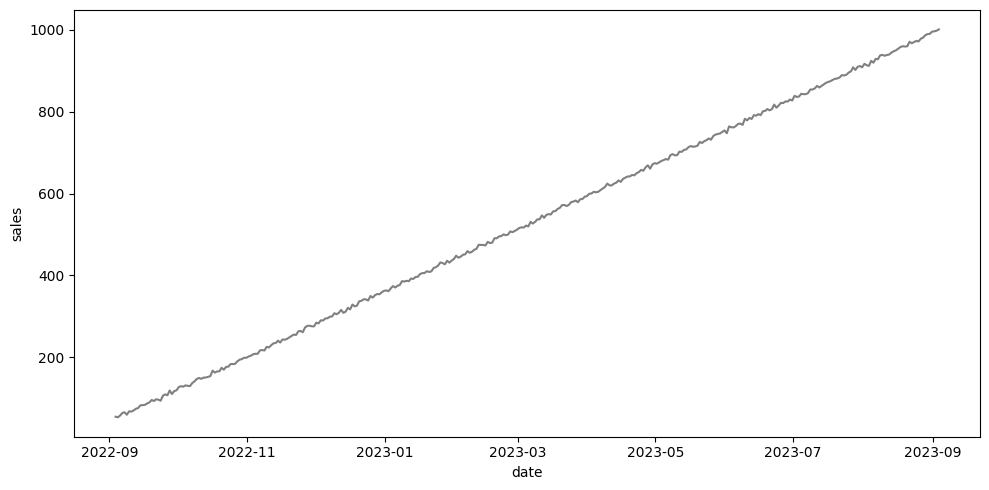

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axix = plt.subplots(figsize = (10,5))
sns.lineplot(data = sales_total, color="grey")
plt.tight_layout()
plt.show()

# Decomposicion de la serie

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(sales_total, period = 12)
decomp

#Analisis de trend
Se refiere a la direccion en qeu se mueven los datos

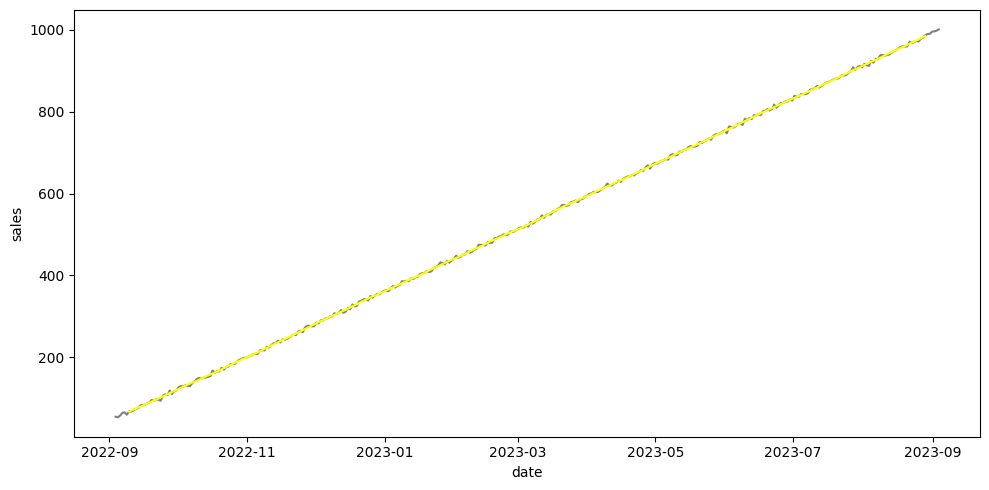

In [7]:
trend = decomp.trend

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_total, color="gray")
sns.lineplot(data = trend, color="yellow")

plt.tight_layout()
plt.show()

Se observa una tendencia positiva, lo que significa aumento de ventas a lo largo del periodo de anos de nuestro set
**Estamos en presencia de una trended time series**


# Analisis de estacionalidad

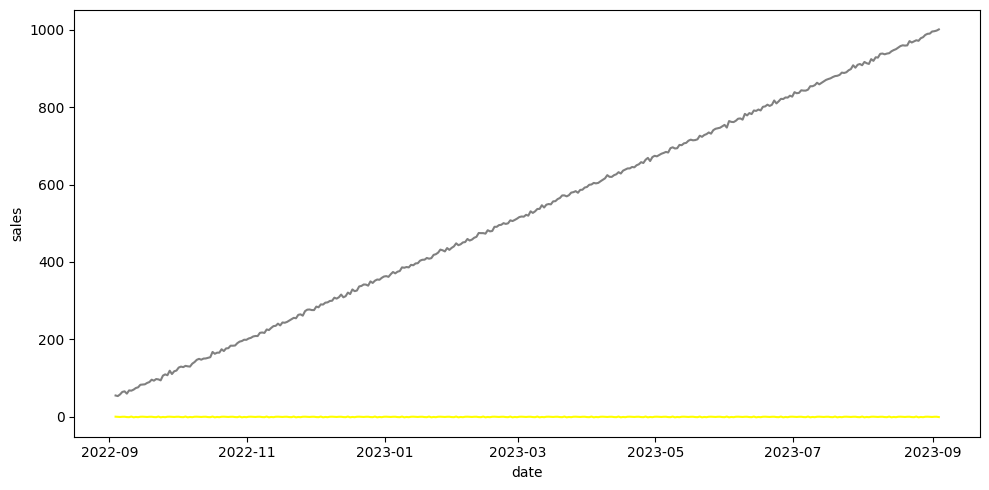

In [8]:
seasonal = decomp.seasonal
fig, axis = plt.subplots(figsize = (10,5))
sns.lineplot(data=sales_total, color="gray")
sns.lineplot(data=seasonal, color="yellow")
plt.tight_layout()
plt.show()

Para evaluar la estacionalidad de la serie temporal podemos aplicar la llamada Prueba de Dickey-Fuller (Dickey-Fuller test), que es un contraste de hipótesis en el que la hipótesis nula es que la serie es no estacionaria, y la alternativa, que es estacionaria:
The Augmented Dickey-Fuller (ADF) test checks for unit roots, which indicate whether a time series has a persistent trend or non-stationarity. **If the test's p-value is below a certain threshold (commonly 0.05), it suggests that the time series does not have a unit root and is stationary.**

In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(sales_total)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

**Con un p-value de .98 podemos decir que probablemente no es estacionaria (no hay patrones que se repitan en intervalos regulares)**

#Analisis de variabilidad

VAmos a observar los residuales, como fluctuan los datos


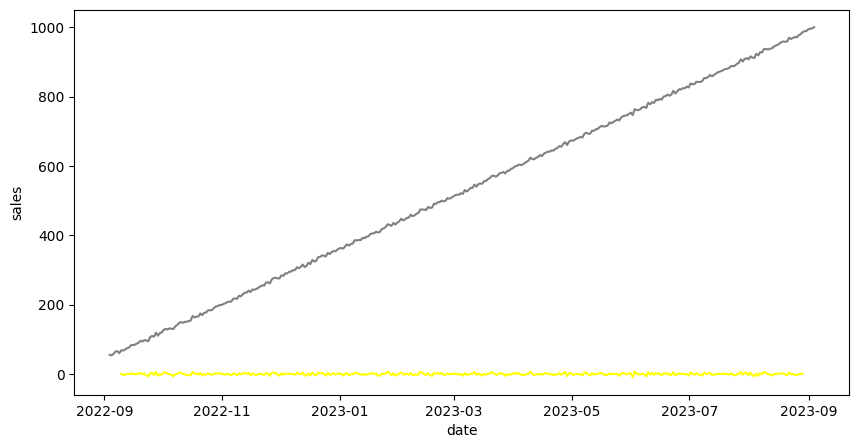

In [10]:
residual = decomp.resid
fig, axis = plt.subplots(figsize = (10,5))
sns.lineplot(data= sales_total, color="grey")
sns.lineplot(data= residual, color="yellow")
plt.tight_layout
plt.show()

# Analisis de autocorrelacion

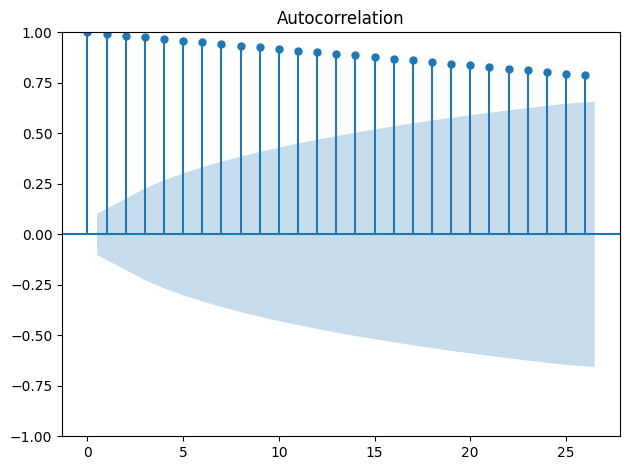

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales_total)
plt.tight_layout()
plt.show()

Se aprecia una alta correlación entre los puntos y sus copias retrasadas, que disminuye a lo largo del tiempo con regularidad.

# Entrenamiento del model

In [12]:
!pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.6 MB/s eta 0:00:00


In [13]:
model = auto_arima(sales_total, seasonal = False, trace = True, m = 5)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (5) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=3.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=1.94 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.96 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=1.47 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 11.523 seconds


Predecir

**Predecimos 90 dias de ventas futuras**

In [14]:
forecast = model.predict(90)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831669
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
                                 ...     
2023-11-28 17:10:08.079328    1223.043737
2023-11-29 17:10:08.079328    1225.641568
2023-11-30 17:10:08.079328    1228.239399
2023-12-01 17:10:08.079328    1230.837230
2023-12-02 17:10:08.079328    1233.435061
Freq: D, Length: 90, dtype: float64

#Graficamos el predict sobre el dataset original

<function matplotlib.pyplot.show(close=None, block=None)>

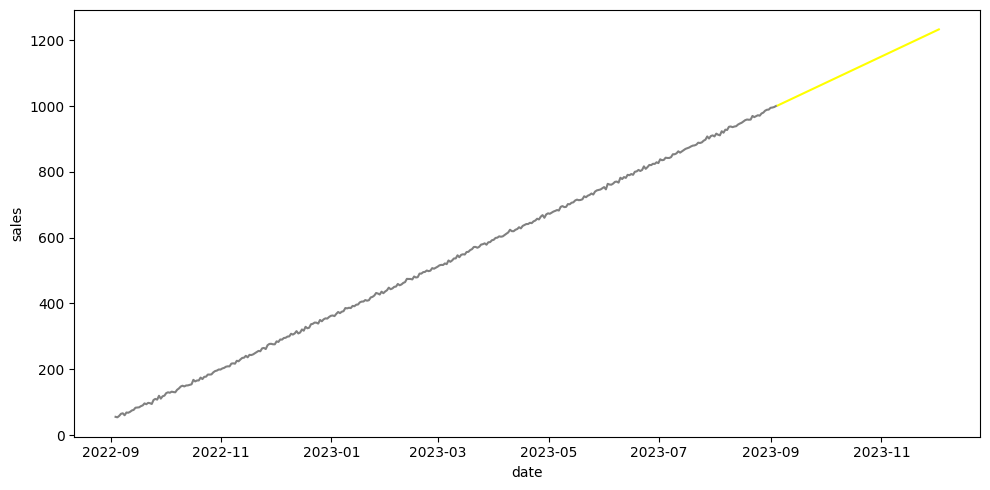

In [15]:
fig, axis = plt.subplots(figsize = (10,5))
sns.lineplot(data = sales_total, color="grey")
sns.lineplot(data = forecast, color="yellow")
plt.tight_layout()
plt.show